In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay




In [2]:
df = pd.read_csv(r"C:\Users\vayun\Downloads\archive\airlines_flights_data.csv", encoding='latin1')
df.head(10)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [3]:
df.shape

(300153, 12)

In [4]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:

pd.isnull(df)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
pd.isnull(df).sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:

df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [10]:

df = pd.read_csv(r"C:\Users\vayun\Downloads\archive\airlines_flights_data.csv", encoding='latin1')

df = df[['price', 'days_left', 'duration']].dropna()
df.head()


,price,days_left,duration
0,5953,1,2.17
1,5953,1,2.33
2,5956,1,2.17
3,5955,1,2.25
4,5955,1,2.33


Simple Linear Regression
MSE: 511205649.31225824
R²: 0.008296355618605089


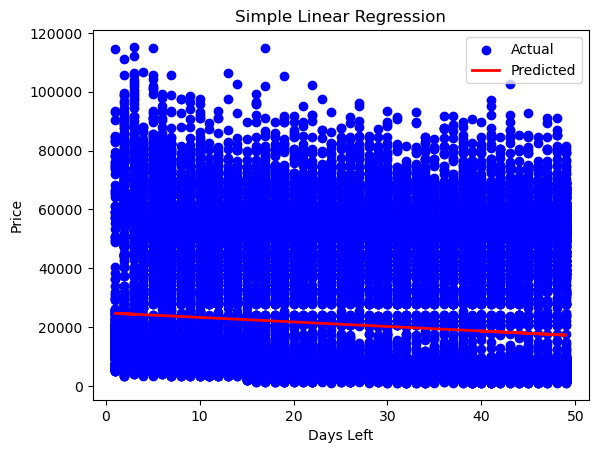

In [11]:
X = df[['days_left']]  # independent variable
y = df['price']        # dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

# Predictions
y_pred_simple = lr_simple.predict(X_test)

# Evaluation
print("Simple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R²:", r2_score(y_test, y_pred_simple))

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [12]:
X = df[['days_left', 'duration']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

# Predictions
y_pred_multiple = lr_multiple.predict(X_test)

# Evaluation
print("\nMultiple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_multiple))
print("R²:", r2_score(y_test, y_pred_multiple))



Multiple Linear Regression
MSE: 489490905.72141135
R²: 0.050421458079467185


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41316
           1       1.00      1.00      1.00     18715

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031



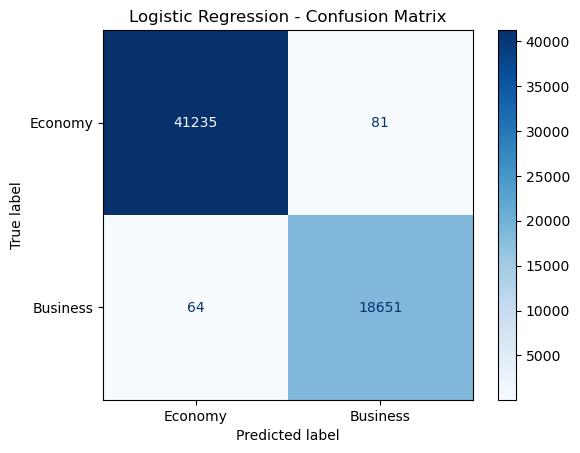

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


df = pd.read_csv(r"C:\Users\vayun\Downloads\archive\airlines_flights_data.csv", encoding='latin1')


df = df[['class', 'price', 'days_left', 'duration']].dropna()


df['class'] = df['class'].map({'Economy': 0, 'Business': 1})


X = df[['price', 'days_left', 'duration']]
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

# 9. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Economy', 'Business'])
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()
